In [ ]:
## Low rank approximation via SVD


### Exercise 3. Read the image peppers.png and convert it to grayscale. Perform its low-rank approximation for k = 1, ..., n. 


### Plot the dependence between the k and MSE of k-rank approximation version of original image. Make a conclusion.

### Conclusion:
As we see in the experiment below each K component adds more of the "information" on the image.
This is consistent with the theory since the compoents include variance of the information.
This relationship is not linear since the first components are sorted to hold more of the variance observed in our data.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

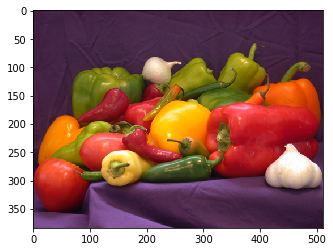

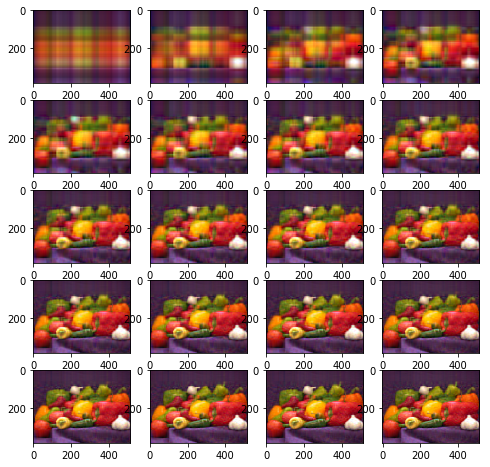

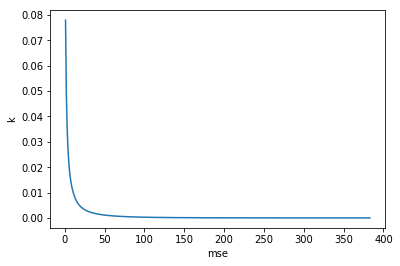

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
imagePepperMatrix = mpimg.imread("./data/peppers.png")
plt.imshow(imagePepperMatrix)
U, S, VT = np.linalg.svd(imagePepperMatrix)

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = np.linalg.svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s


def compress_show_color_images_layer(image, k):
    """
     compress and display the reconstructed color image using the layer method 
    """
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
    return image_reconst

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
k=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img = compress_show_color_images_layer(imagePepperMatrix,k)
    plt.imshow(img)
    k+= 1

plt.show()



mses = [
    (
        k,
        mse(
            imagePepperMatrix,
            compress_show_color_images_layer(imagePepperMatrix,k)
        )
    )
    for k in range(1,384)
]
plt.plot(
    [i[0] for i in mses],
    [i[1] for i in mses]
)
plt.ylabel('k')
plt.xlabel('mse')
plt.show()